In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import os
import warnings
warnings.filterwarnings('ignore')

tomato_dir_list = []
# importing dataset
dir = os.listdir('PlantVillage')
for filenames in dir:
    print(filenames)
    if ("Tomato" in filenames):
        tomato_dir_list.append(filenames)

Tomato_Bacterial_spot
Tomato_Early_blight
Tomato_healthy
Tomato_Late_blight
Tomato_Leaf_Mold
Tomato_Septoria_leaf_spot
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato__Target_Spot
Tomato__Tomato_mosaic_virus
Tomato__Tomato_YellowLeaf__Curl_Virus


In [3]:
Current_Dir = os.getcwd()
dataset_dir = pathlib.Path(Current_Dir)
print(dataset_dir)

C:\Users\monoz\Desktop\tomato


In [4]:
#Global initialization of some imp variables
Image_Size = 256
Batch_Size = 32
Channels = 3
Epochs = 40

In [5]:
dataset_dir = "PlantVillage"
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir, batch_size = Batch_Size, image_size = (Image_Size, Image_Size), shuffle = True)

Found 16011 files belonging to 10 classes.


In [6]:
#Folders(classes) in 'Dataset' directory
class_name = dataset.class_names
class_name

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [7]:
print(f"Number of batches : {len(dataset)}, each batch has {Batch_Size} image.")
print(dataset)

Number of batches : 501, each batch has 32 image.
<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


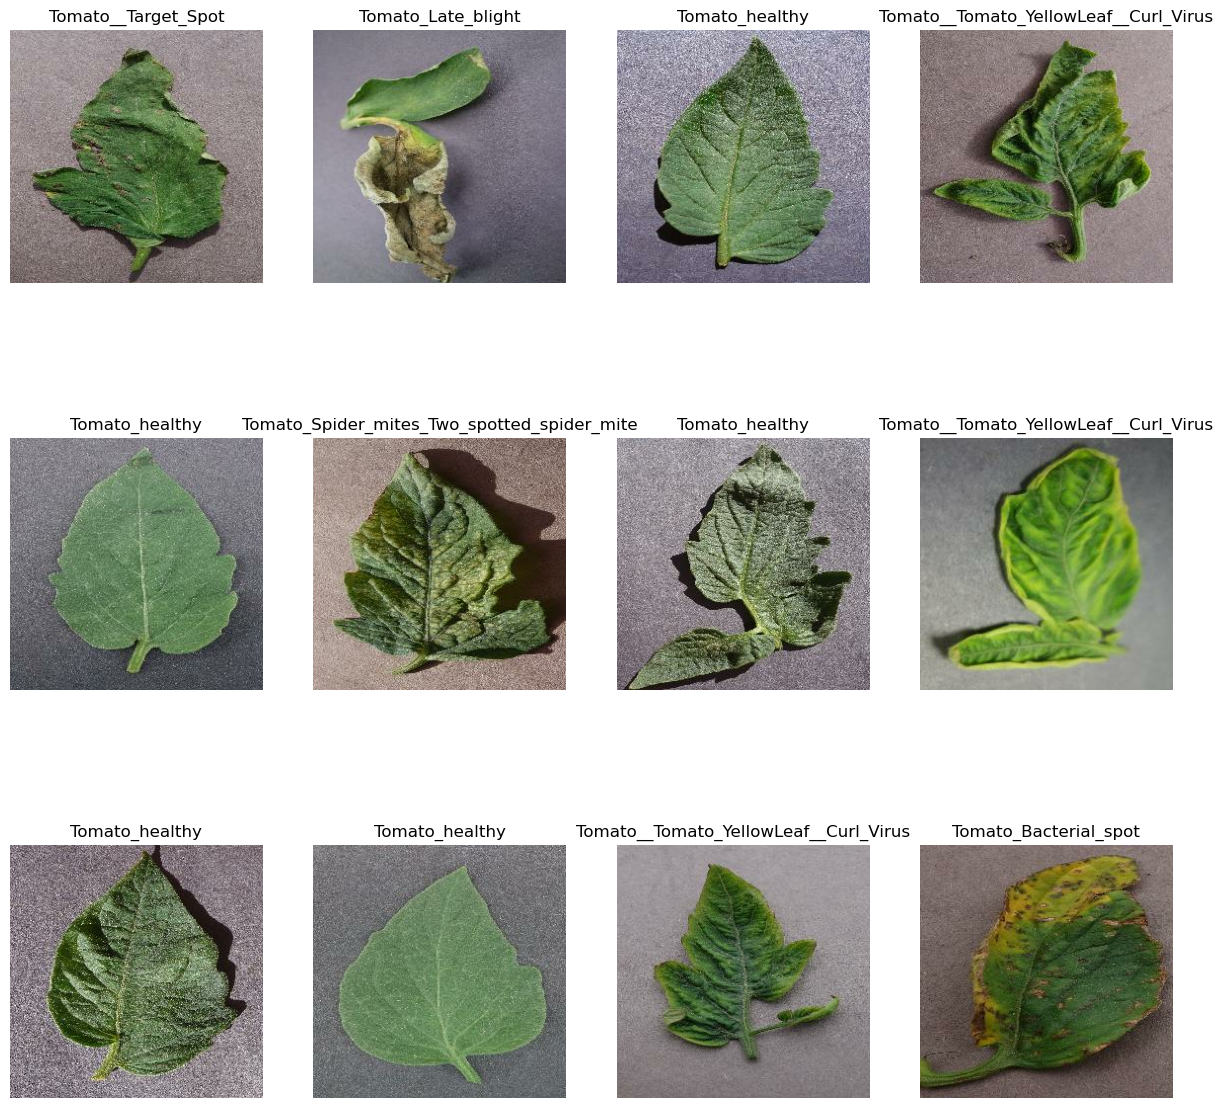

In [8]:
# Plotting the image
plt.figure(figsize = (15,15))
# dataset.take(count) : Creates a Dataset with at most 'count' elements(batch) from the dataset
for image, label in dataset.take(1): 
    for i in range(12):
        plt.subplot(3, 4, i+1) # many plots at a time =>subpots
        plt.imshow(image[i].numpy().astype('uint8')) #converting all data of image into numpy and than to intiger type as they were in float.
        plt.title(class_name[label[i]])  # title of the class_name of image
        plt.axis("off") # Hide the values of graph

In [9]:
# Function for Splitting the data
def split_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 10)
    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [10]:
train_data, val_data, test_data = split_dataset(dataset)

In [11]:
print("Size of Data is :{0} \nBatch size of Training Data is :{1}\nBatch size of Validation Data is :{2} \nBatch size of Testing Data is :{3} " .format(len(dataset), len(train_data), len(val_data), len(test_data)))

Size of Data is :501 
Batch size of Training Data is :400
Batch size of Validation Data is :50 
Batch size of Testing Data is :51 


In [12]:
# caching,shuffle and prefetching the data
train_ds = train_data.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_data.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_data.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)

### Data Pre-processing

In [13]:
# Image Preprocessing : Rescaling and Resizing
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(Image_Size, Image_Size),
    tf.keras.layers.Rescaling(1.0/255)
])

In [14]:
# Data augmentation by flipping and rotating existing images
data_augmentation = tf.keras.Sequential([
     tf.keras.layers.RandomFlip(mode="horizontal_and_vertical"),
     tf.keras.layers.RandomRotation(factor = 0.5)
])

## Model Building

In [15]:
class_name

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [16]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Is GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.10.1
Is GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [53]:
# Creating Convolution layer 
input_shape = (Image_Size, Image_Size, Channels)
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation='softmax')
    
])
model.summary()
model.build()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 125, 125, 64)      9280      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

In [54]:
model.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), 
    metrics = ['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
with tf.device('/GPU:0'):
    history = model.fit(train_data, epochs = 100, batch_size = Batch_Size, verbose = 1, validation_data = val_data, callbacks=[early_stopping])

Epoch 1/100
400/400 [==============================] - 124s 289ms/step - loss: 1.3690 - accuracy: 0.5162 - val_loss: 2.0500 - val_accuracy: 0.4419
Epoch 2/100
400/400 [==============================] - 123s 290ms/step - loss: 0.7530 - accuracy: 0.7293 - val_loss: 2.0588 - val_accuracy: 0.5119
Epoch 3/100
400/400 [==============================] - 122s 288ms/step - loss: 0.5827 - accuracy: 0.7898 - val_loss: 0.9322 - val_accuracy: 0.7212
Epoch 4/100
400/400 [==============================] - 122s 290ms/step - loss: 0.4700 - accuracy: 0.8340 - val_loss: 1.1251 - val_accuracy: 0.7031
Epoch 5/100
400/400 [==============================] - 122s 289ms/step - loss: 0.4078 - accuracy: 0.8591 - val_loss: 0.3808 - val_accuracy: 0.8550
Epoch 6/100
400/400 [==============================] - 122s 288ms/step - loss: 0.3321 - accuracy: 0.8837 - val_loss: 0.8068 - val_accuracy: 0.7656
Epoch 7/100
400/400 [==============================] - 122s 289ms/step - loss: 0.3055 - accuracy: 0.8936 - val_loss: 0

## Analyzing the Output

Text(0.5, 1.0, 'Training and Validation Loss')

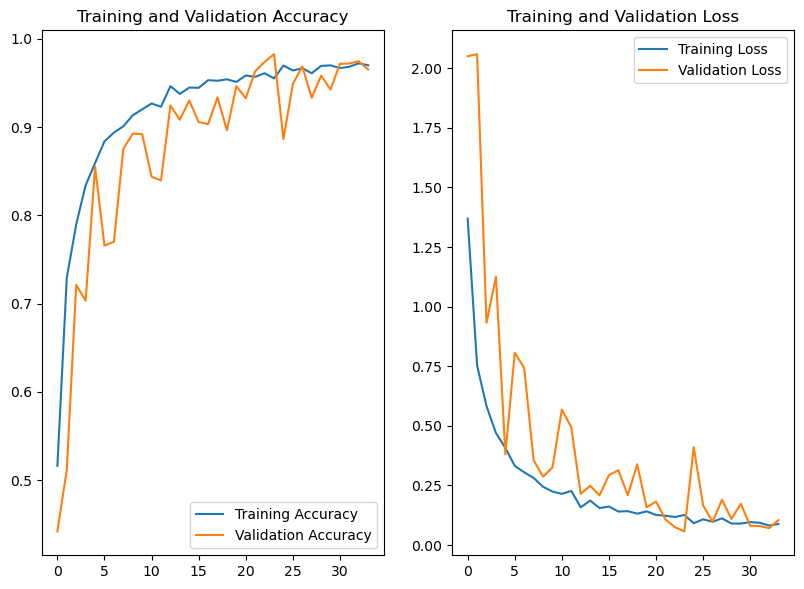

In [55]:
# Getting the model history to analyse
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(early_stopping.stopped_epoch+1), train_acc, label = 'Training Accuracy')
plt.plot(range(early_stopping.stopped_epoch+1), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(early_stopping.stopped_epoch+1), train_loss, label = 'Training Loss')
plt.plot(range(early_stopping.stopped_epoch+1), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [56]:
scores = model.evaluate(train_data)

400/400 [==============================] - 16s 23ms/step - loss: 0.0911 - accuracy: 0.9690


In [57]:
scores = model.evaluate(test_data)

51/51 [==============================] - 9s 23ms/step - loss: 0.0918 - accuracy: 0.9651


In [58]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 400}

In [59]:
early_stopping.stopped_epoch

33

First Image of batch to predict :
Actual label :  Tomato_Late_blight
1/1 [==============================] - 0s 265ms/step
Predicted label :  Tomato_Late_blight


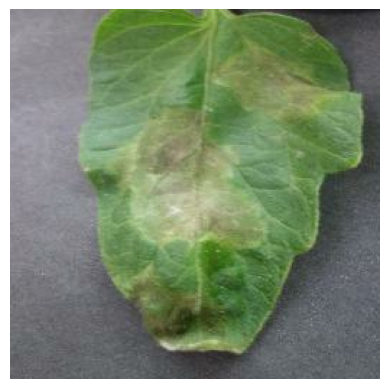

In [60]:
#plotting image
for batch_image, batch_label in train_data.take(1):
    first_image = batch_image[0].numpy().astype('uint8')
    first_label = class_name[batch_label[0]]
    
    print('First Image of batch to predict :')
    plt.imshow(first_image)
    print('Actual label : ', first_label)
    
    batch_prediction = model.predict(batch_image)
    print('Predicted label : ', class_name[np.argmax(batch_prediction[0])])
    plt.axis('off')

1/1 [==============================] - 0s 50ms/step


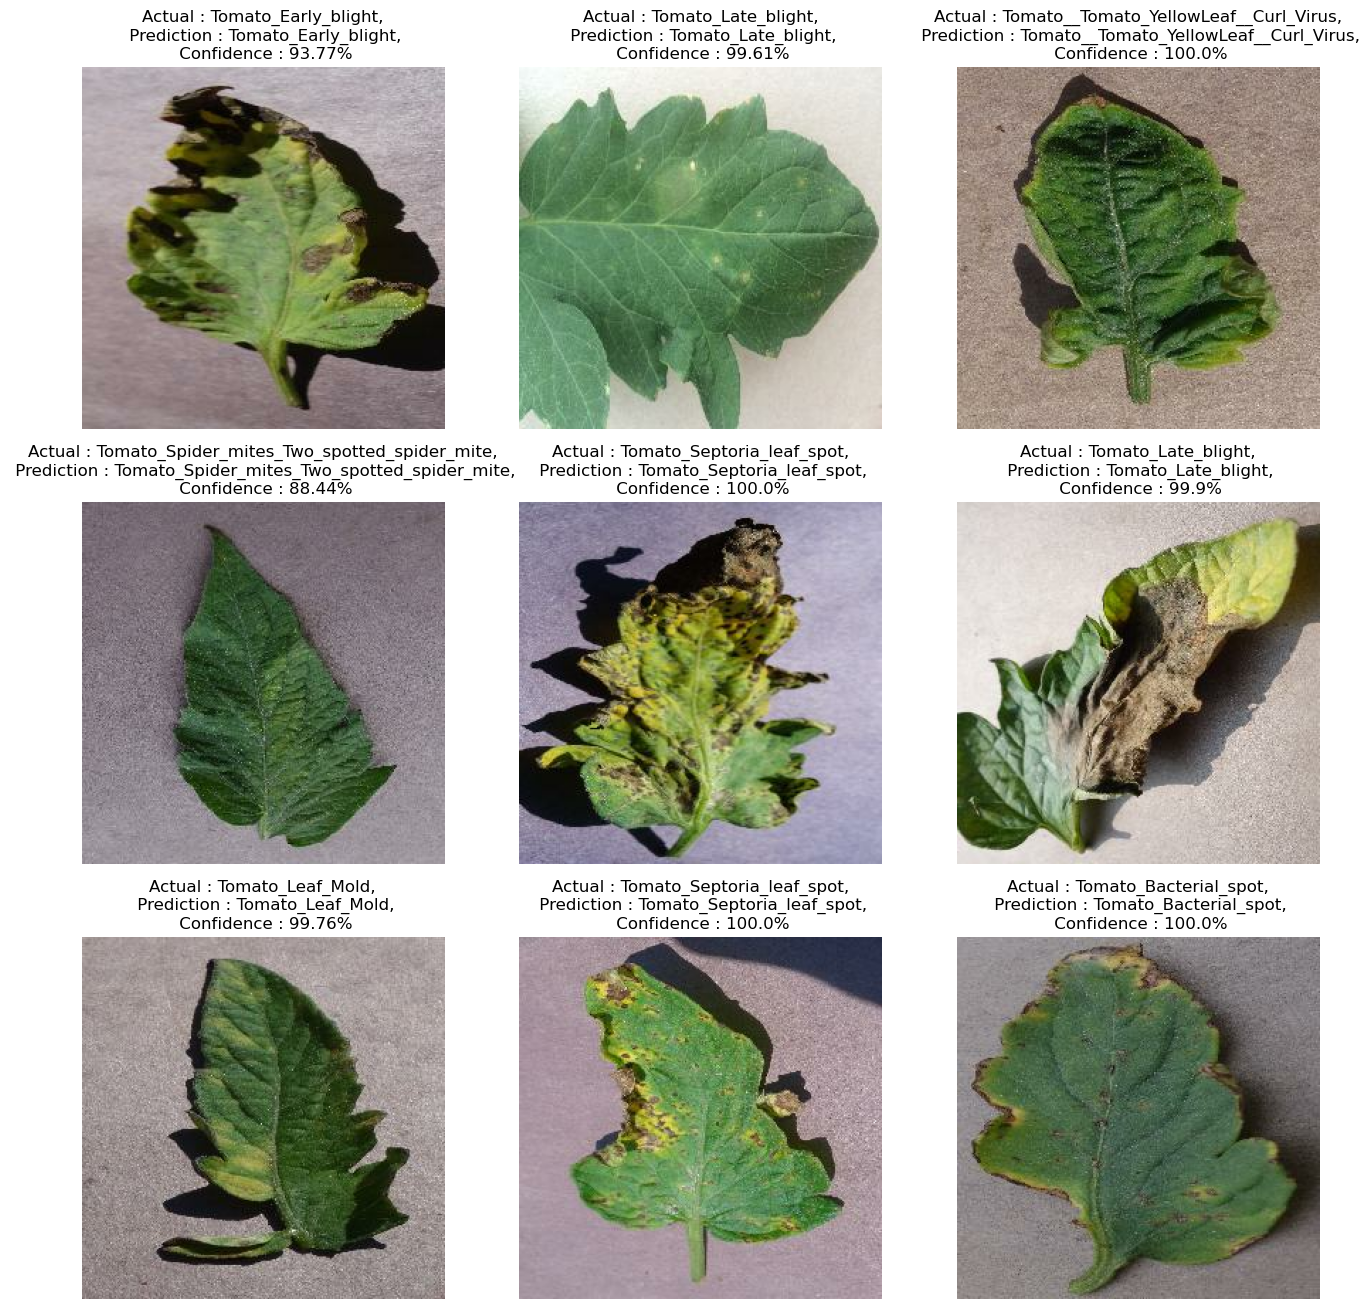

In [61]:
# plotting batch of images with its actual label, predicted label and confidence
plt.figure(figsize = (16,16))
for batch_image, batch_label in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        image = batch_image[i].numpy().astype('uint8')
        label = class_name[batch_label[i]]
    
        plt.imshow(image)
    
        batch_prediction = model.predict(batch_image)
        predicted_class = class_name[np.argmax(batch_prediction[i])]
        confidence = round(np.max(batch_prediction[i]) * 100, 2)
        
        plt.title(f'Actual : {label},\n Prediction : {predicted_class},\n Confidence : {confidence}%')
    
        plt.axis('off')

In [62]:
# end